In [1]:
from fastai.vision.all import *

In [2]:
%matplotlib inline
%reload_ext autoreload

In [3]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [5]:
%cd /home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray

/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray


In [6]:
from pathlib import Path
path = Path('.')

In [7]:
dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_2_class_gray', valid_pct= 0.2, item_tfms=Resize(224), shuffle=True, bs=32, seed=42)

In [8]:
dls.valid_ds

(#49) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1))...]

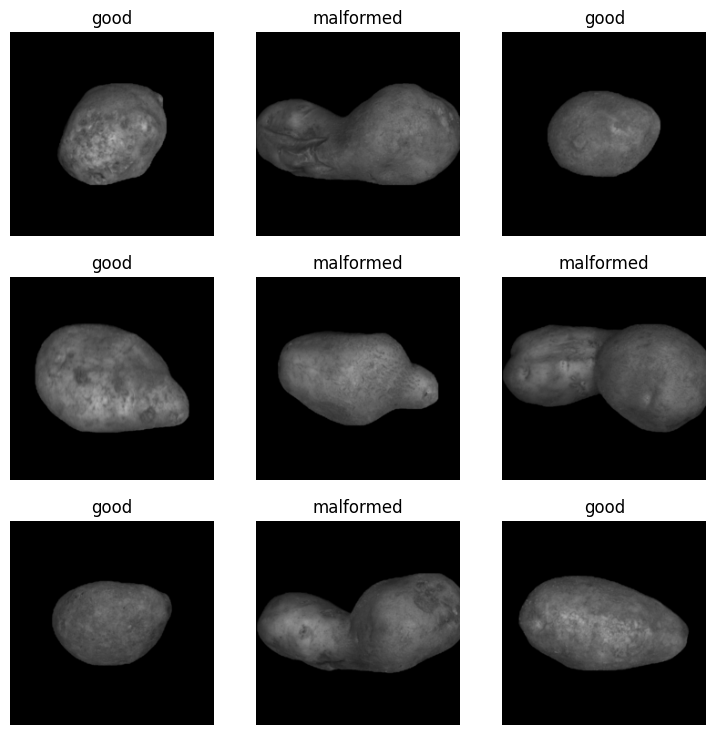

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [11]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.896411,0.571795,0.306122,00:05
1,0.772618,0.519913,0.204082,00:05
2,0.693871,0.386528,0.163265,00:05
3,0.537873,0.264615,0.102041,00:05
4,0.452363,0.231531,0.122449,00:05
5,0.380544,0.240003,0.142857,00:05
6,0.327342,0.238107,0.102041,00:05
7,0.288867,0.200867,0.081633,00:05
8,0.252775,0.159943,0.061224,00:05
9,0.227369,0.131438,0.040816,00:05


SuggestedLRs(valley=0.00019054606673307717)

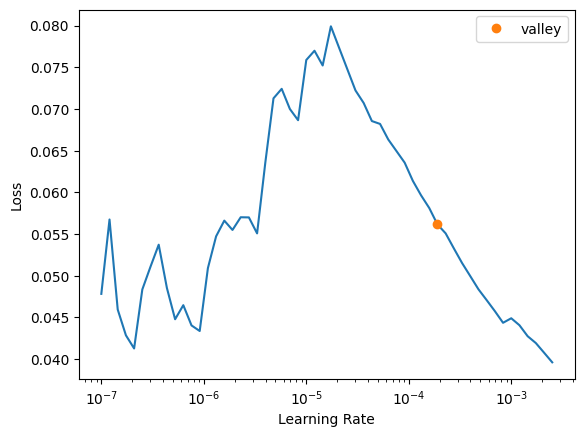

In [12]:
learn.lr_find()

In [13]:
learn.fine_tune(8, base_lr=0.000190546066733077175)

epoch,train_loss,valid_loss,error_rate,time
0,0.078177,0.110493,0.040816,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.064968,0.105223,0.020408,00:05
1,0.057232,0.099507,0.040816,00:05
2,0.044283,0.081485,0.040816,00:06
3,0.042726,0.061018,0.020408,00:06
4,0.034430,0.053778,0.000000,00:05
5,0.030359,0.050193,0.000000,00:05
6,0.029084,0.048821,0.000000,00:05
7,0.028901,0.046619,0.000000,00:05


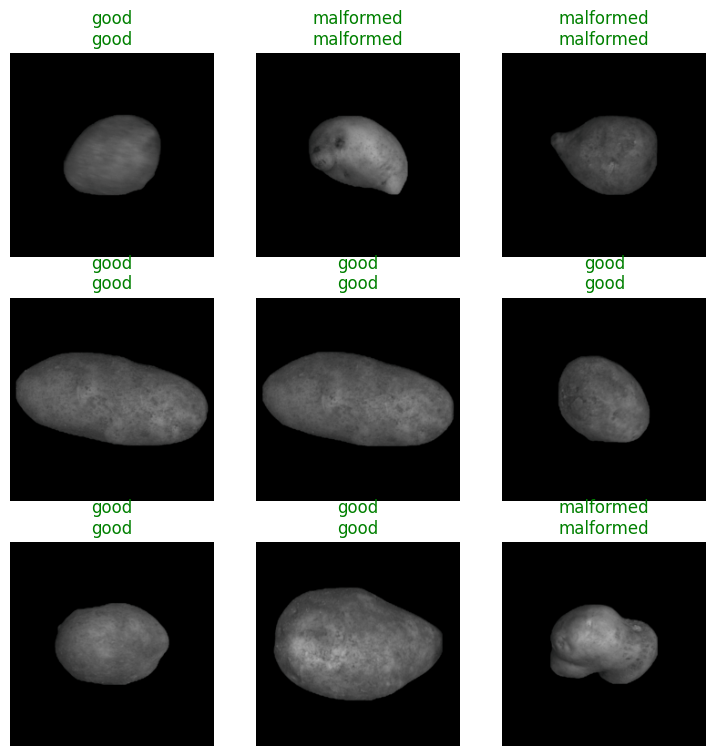

In [14]:
learn.show_results()

In [15]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [16]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.060008,0.824950,0.591837,00:05
1,1.082724,0.827764,0.571429,00:05
2,0.980505,0.635691,0.714286,00:06
3,0.890432,0.441113,0.755102,00:05
4,0.791839,0.337893,0.836735,00:05
5,0.697889,0.296657,0.836735,00:06
6,0.617474,0.304906,0.857143,00:05
7,0.543982,0.276045,0.836735,00:05
8,0.487767,0.267654,0.877551,00:05
9,0.447791,0.254875,0.897959,00:05


SuggestedLRs(valley=0.00013182566908653826)

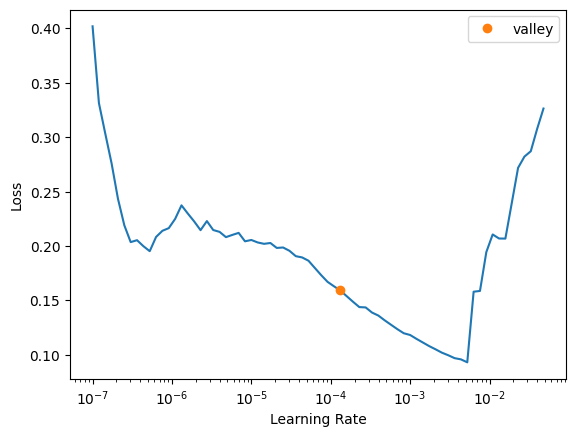

In [17]:
learn_accuracy.lr_find()

In [18]:
learn_accuracy.fine_tune(10, base_lr=0.00013182566908653826)

epoch,train_loss,valid_loss,accuracy,time
0,0.218869,0.219891,0.897959,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.140557,0.189439,0.938776,00:05
1,0.120034,0.160160,0.938776,00:06
2,0.110164,0.129383,0.959184,00:06
3,0.113311,0.120255,0.959184,00:05
4,0.106919,0.100216,0.959184,00:05
5,0.099090,0.098992,0.959184,00:05
6,0.091364,0.091407,0.959184,00:05
7,0.088894,0.090496,0.959184,00:05
8,0.083824,0.093006,0.959184,00:05
9,0.073924,0.089044,0.959184,00:05


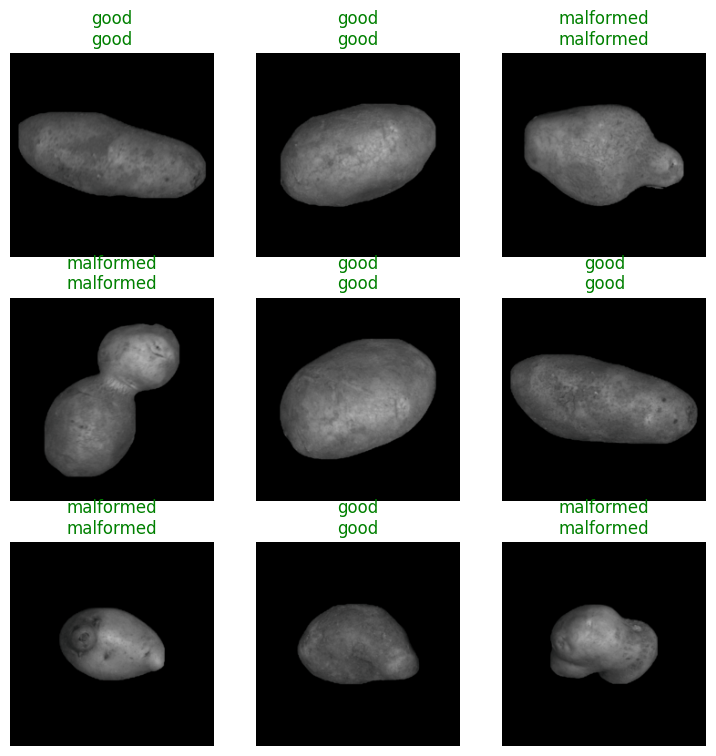

In [19]:
learn_accuracy.show_results()

In [22]:
from PIL import Image

In [31]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
test_img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/int_potato.jpg"
convert_gray = Image.open(test_img_path)
convert_gray = convert_gray.convert('L')

# learn.predict(convert_gray)
learn.predict(test_img_path)

('malformed', tensor(1), tensor([0.3234, 0.6766]))

<Axes: >

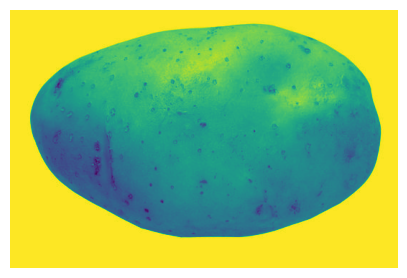

In [32]:
convert_gray.show()

In [33]:
learn.export("/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray/models/export_2_class_80_20_gray.pkl")

In [ ]:
# To load the model and run prediction
load_saved_model = load_learner("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/export_2_class_80_20.pkl")

In [ ]:
load_saved_model.predict()